<a href="https://colab.research.google.com/github/gustahps-0712/MachineLearningProjects/blob/main/Aprova%C3%A7%C3%A3o_de_Cr%C3%A9dito_Imobili%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> Aprovação de Financiamento Imobiliário</font>


#1° Problema de Negócio 
Build a Predictive Machine that, based on historical customer data, approves or rejects the customer's mortgage loan.



# 2° Análise Exploratória dos Dados

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



In [53]:

# Import the adult.txt file into Python
data = pd.read_csv('/content/imobiliario.csv', sep=',')


In [54]:
#Seeing the first records
data.head()

,idade,empregador,renda,education,education_num,estado_civil,ocupacao,relacionamento,race,sex,investimentos,endividamento,horas_por_semana,nacionalidade,aprovacao_credito
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,não aprovado
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,não aprovado
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,não aprovado
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,não aprovado
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,não aprovado


In [55]:
# Dataset informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idade              32561 non-null  int64 
 1   empregador         32561 non-null  object
 2   renda              32561 non-null  int64 
 3   education          32561 non-null  object
 4   education_num      32561 non-null  int64 
 5   estado_civil       32561 non-null  object
 6   ocupacao           32561 non-null  object
 7   relacionamento     32561 non-null  object
 8   race               32561 non-null  object
 9   sex                32561 non-null  object
 10  investimentos      32561 non-null  int64 
 11  endividamento      32561 non-null  int64 
 12  horas_por_semana   32561 non-null  int64 
 13  nacionalidade      32561 non-null  object
 14  aprovacao_credito  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [56]:
#descriptive statistics of numeric variables
data.describe()

,idade,renda,education_num,investimentos,endividamento,horas_por_semana
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [57]:
# TARGET Frequency Table
data['aprovacao_credito'].value_counts()

não aprovado    24720
APROVADO         7841
Name: aprovacao_credito, dtype: int64

In [58]:
#Variable Frequency Table
data.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [59]:
#Variable Frequency Table
data.nacionalidade.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [60]:
#Variable Frequency Table
data.ocupacao.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: ocupacao, dtype: int64

In [61]:
#Variable Frequency Table
data.estado_civil.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: estado_civil, dtype: int64

In [62]:
#Variable Frequency Table
data.relacionamento.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relacionamento, dtype: int64

In [63]:
#Check fields with missing values
data.isnull().sum()

idade                0
empregador           0
renda                0
education            0
education_num        0
estado_civil         0
ocupacao             0
relacionamento       0
race                 0
sex                  0
investimentos        0
endividamento        0
horas_por_semana     0
nacionalidade        0
aprovacao_credito    0
dtype: int64

In [64]:
# checks for duplicate records
data.duplicated().sum()

24

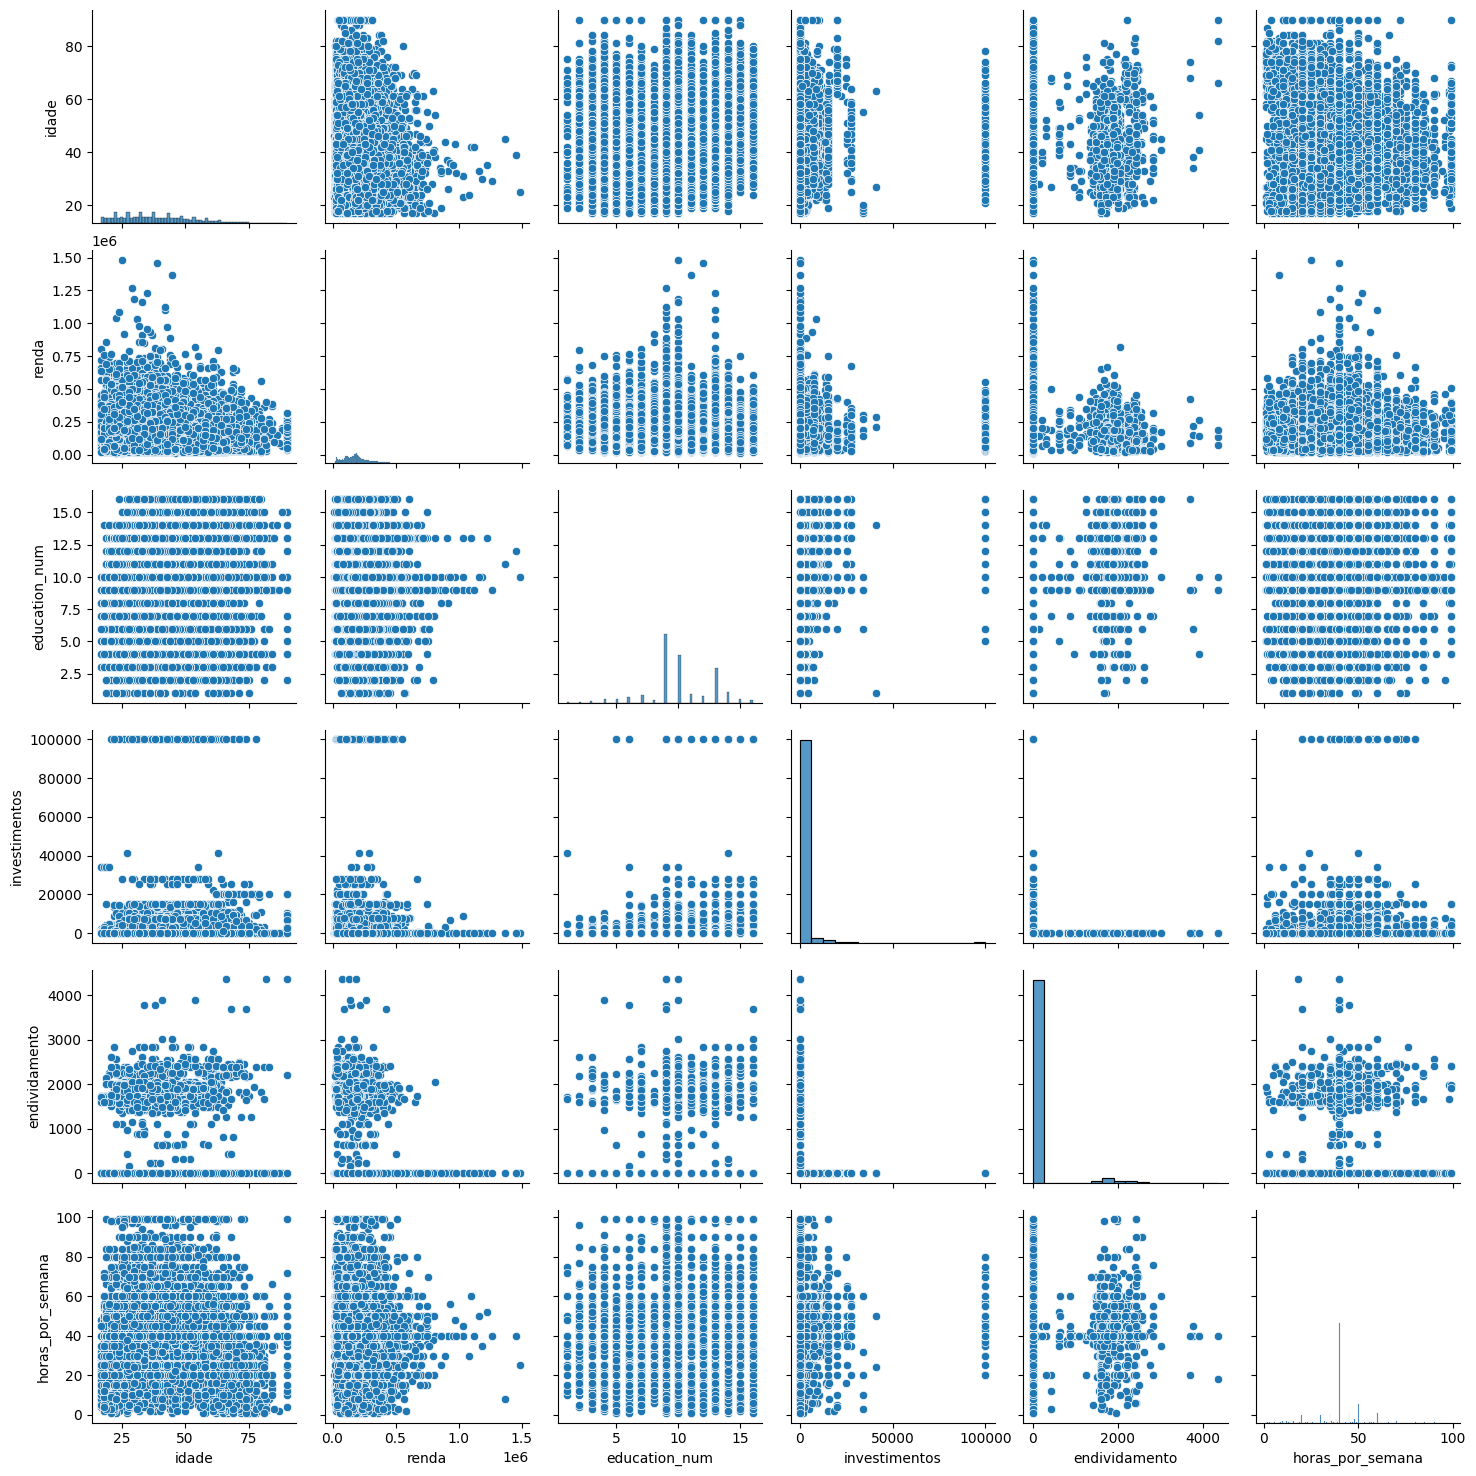

In [65]:
# Exploring Data Visualization
# Usin Matplotlib
sns.pairplot(data)

#3° Pré-Processamento dos Dados

In [66]:
#Eliminate duplicate records
data.drop_duplicates(keep='first', inplace=True)
data
data.duplicated().sum()

0

In [80]:
# Convertendo campos strings em numéricos
for label in ['race', 'ocupacao','education','empregador','estado_civil','relacionamento','sex','nacionalidade','aprovacao_credito']:
    data[label] = LabelEncoder().fit_transform(data[label])


In [81]:
# Separating the algorithm's input variables into "X"
X = data[['race', 'horas_por_semana', 'ocupacao', 'education', 'empregador','estado_civil','relacionamento','sex','nacionalidade']]


In [82]:
# Calculate the correlation between the variables
correlacoes = X.corr()


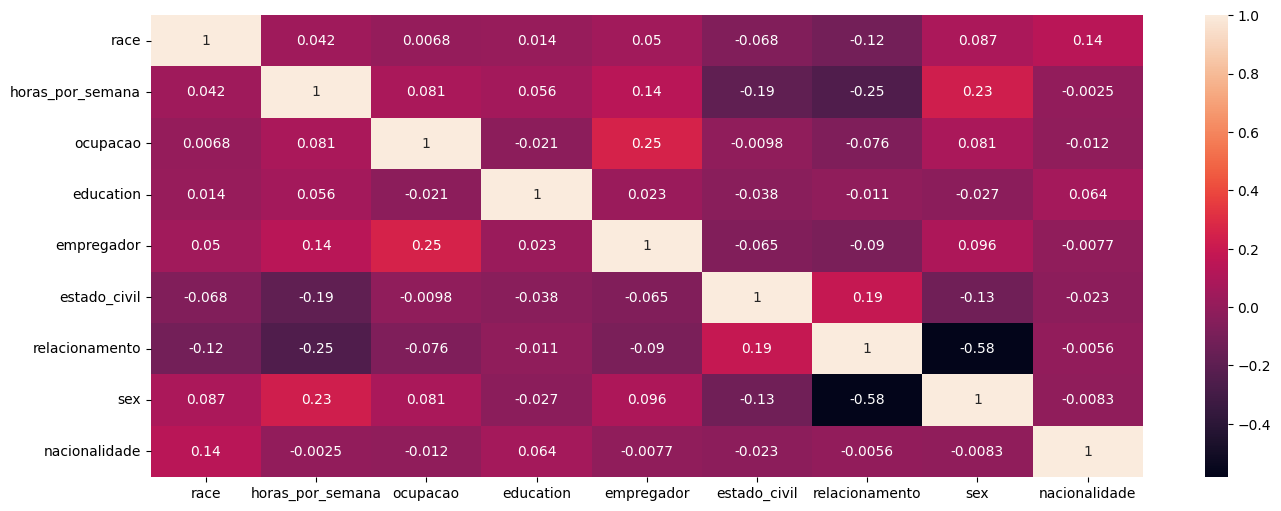

In [83]:
#Using seaborn's heatmap method

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(16, 6))

# Create the heatmap using seaborn's heatmap function
sns.heatmap(data=correlacoes, annot=True)

# Display the plot inline
%matplotlib inline



In [84]:
# Separating the Response Variable /Target / Class / Label
Y = data['aprovacao_credito'].values.tolist()



In [86]:
# Separating 30% of the records for TEST of the Predictive Machine
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#4° Máquina Preditiva Segmentação de Clientes

In [87]:
# Creating the Predictive Machine
#RandomForestClassifier(n_estimators=1000)
clf = XGBClassifier(n_estimators=1000 , learning_rate=0.01)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   idade              32537 non-null  int64
 1   empregador         32537 non-null  int64
 2   renda              32537 non-null  int64
 3   education          32537 non-null  int64
 4   education_num      32537 non-null  int64
 5   estado_civil       32537 non-null  int64
 6   ocupacao           32537 non-null  int64
 7   relacionamento     32537 non-null  int64
 8   race               32537 non-null  int64
 9   sex                32537 non-null  int64
 10  investimentos      32537 non-null  int64
 11  endividamento      32537 non-null  int64
 12  horas_por_semana   32537 non-null  int64
 13  nacionalidade      32537 non-null  int64
 14  aprovacao_credito  32537 non-null  int64
dtypes: int64(15)
memory usage: 4.0 MB


In [88]:
# Training the Predictive Machine with training data
clf = clf.fit(X_train, Y_train)
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#5° Avaliação da Máquina Preditiva

In [89]:
# Evaluating the Accuracy of the Predictive Machine

accuracy = clf.score(X_test, Y_test)
print ('Accuracy: ' + str(accuracy))




Accuracy: 0.8380454824830977


In [90]:
# Evaluating the Cofusion Matrix and the Classification Report

prediction = clf.predict(X_test)
cm = confusion_matrix(prediction, Y_test)
print(cm)
cr = classification_report(prediction, Y_test)
print(cr)


[[1309  596]
 [ 985 6872]]
              precision    recall  f1-score   support

           0       0.57      0.69      0.62      1905
           1       0.92      0.87      0.90      7857

    accuracy                           0.84      9762
   macro avg       0.75      0.78      0.76      9762
weighted avg       0.85      0.84      0.84      9762

